In [495]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

In [496]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [497]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


**Attribute Information:**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [498]:
df = data.copy()

## EDA

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [500]:
df.shape

(244, 14)

In [501]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


# Exploring Data Anaylsis

In [502]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

We have 1 categorical features : ['Classes']


In [503]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

fire             53.688525
not fire         40.163934
fire              2.049180
not fire          2.049180
fire              0.819672
not fire          0.409836
not fire          0.409836
not fire          0.409836
Name: Classes, dtype: float64
---------------------------


## Univariate Anaylsis

### Numeric Features

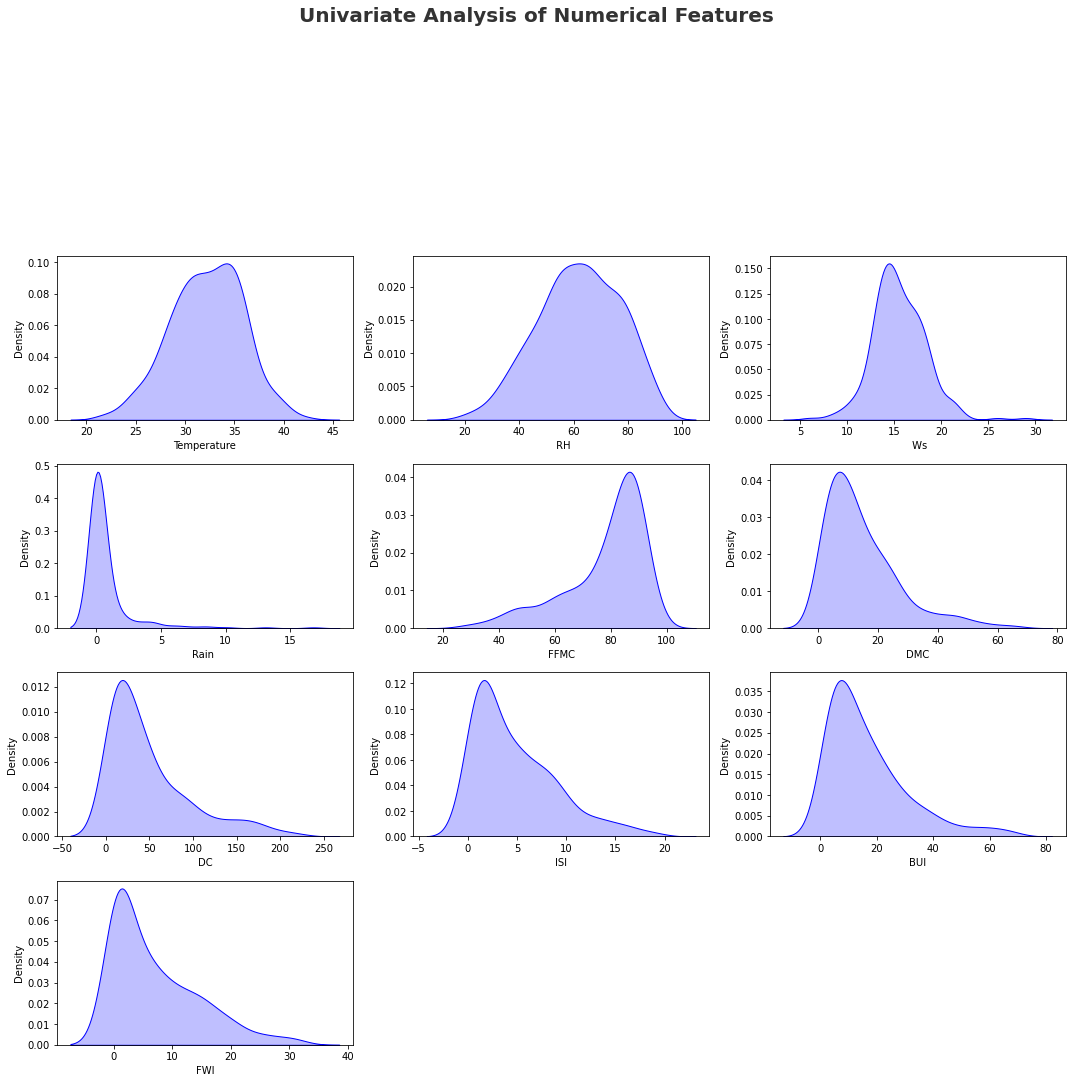

In [504]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(3, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**report**
 * Temperature,RH,WS are slightliy showing normal distribution
 * FWI,DC,BUI,ISI,FWI,RAIN,DMC are Right Skewed
 * FFMC is left skewed


### Categorical Features

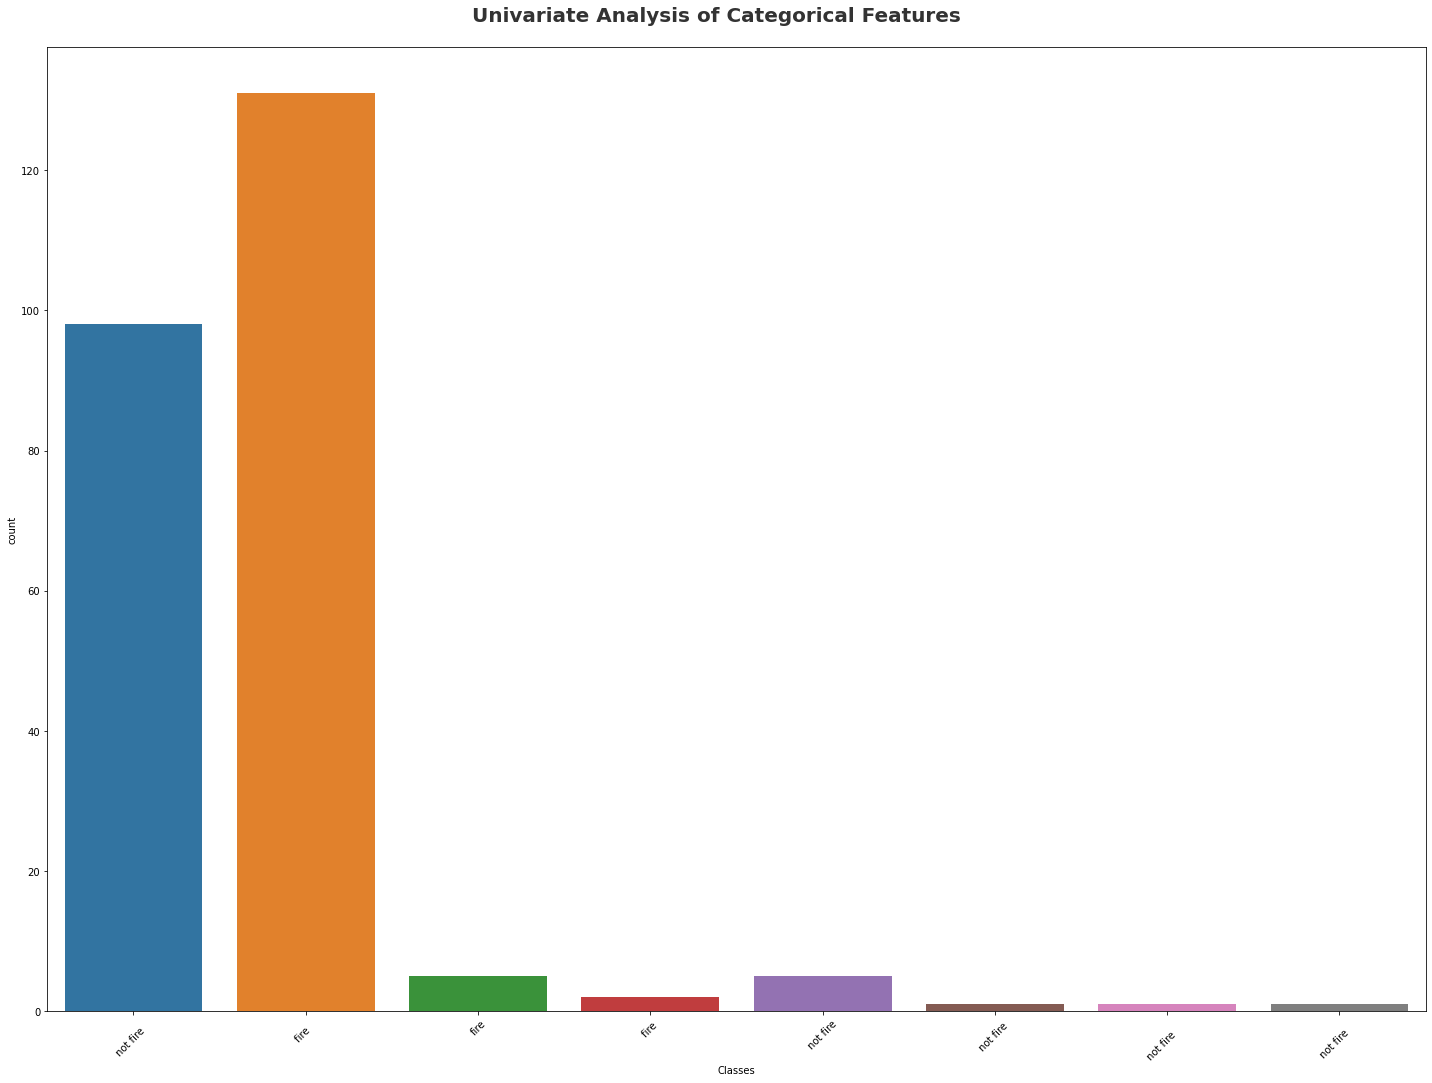

In [505]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(df['Classes'])
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.tight_layout()

here there are actually only 2 classes due to some space errors it's showing so many classes we have to remove them in feature engineering

## Multivariate Analysis

* multivariate analysis is the anaylsis of more than one variable

### Check Multicollinearity in Numerical features

In [506]:
df[(list(df.columns)[1:])].corr()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
month,1.000000,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.059017,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.566670
RH,-0.037884,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.580957
Ws,-0.041447,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032368
Rain,0.035322,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324422
FFMC,0.015577,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.691132
DMC,0.068178,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875864
DC,0.127669,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739521
ISI,0.061680,NaN,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.922895


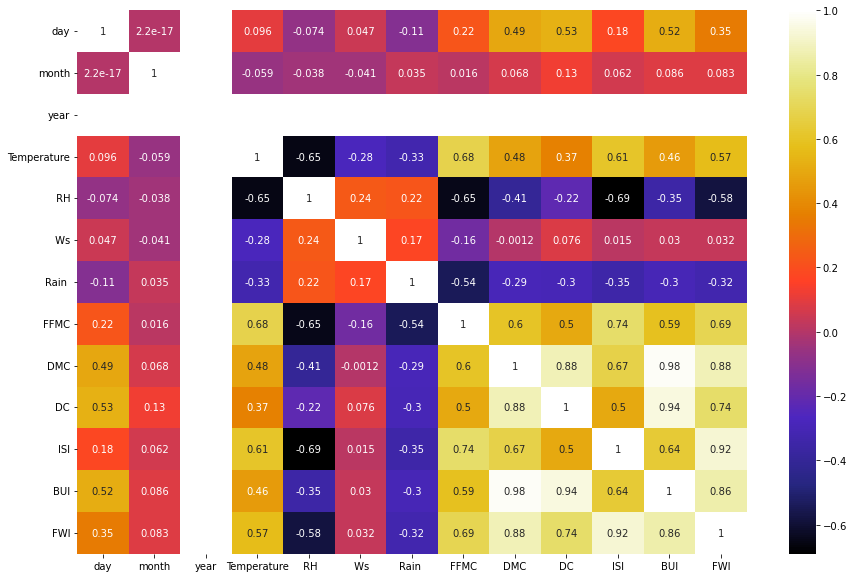

In [507]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Observation**
Our Target feature temperature is positively corelated with FFMC,DMC,DC,ISI,BUI,FWI and 
Negatively corelated with Rain,Ws,RH,Year,Month,Day

### Checking Null Values

In [508]:
df = df.dropna()
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

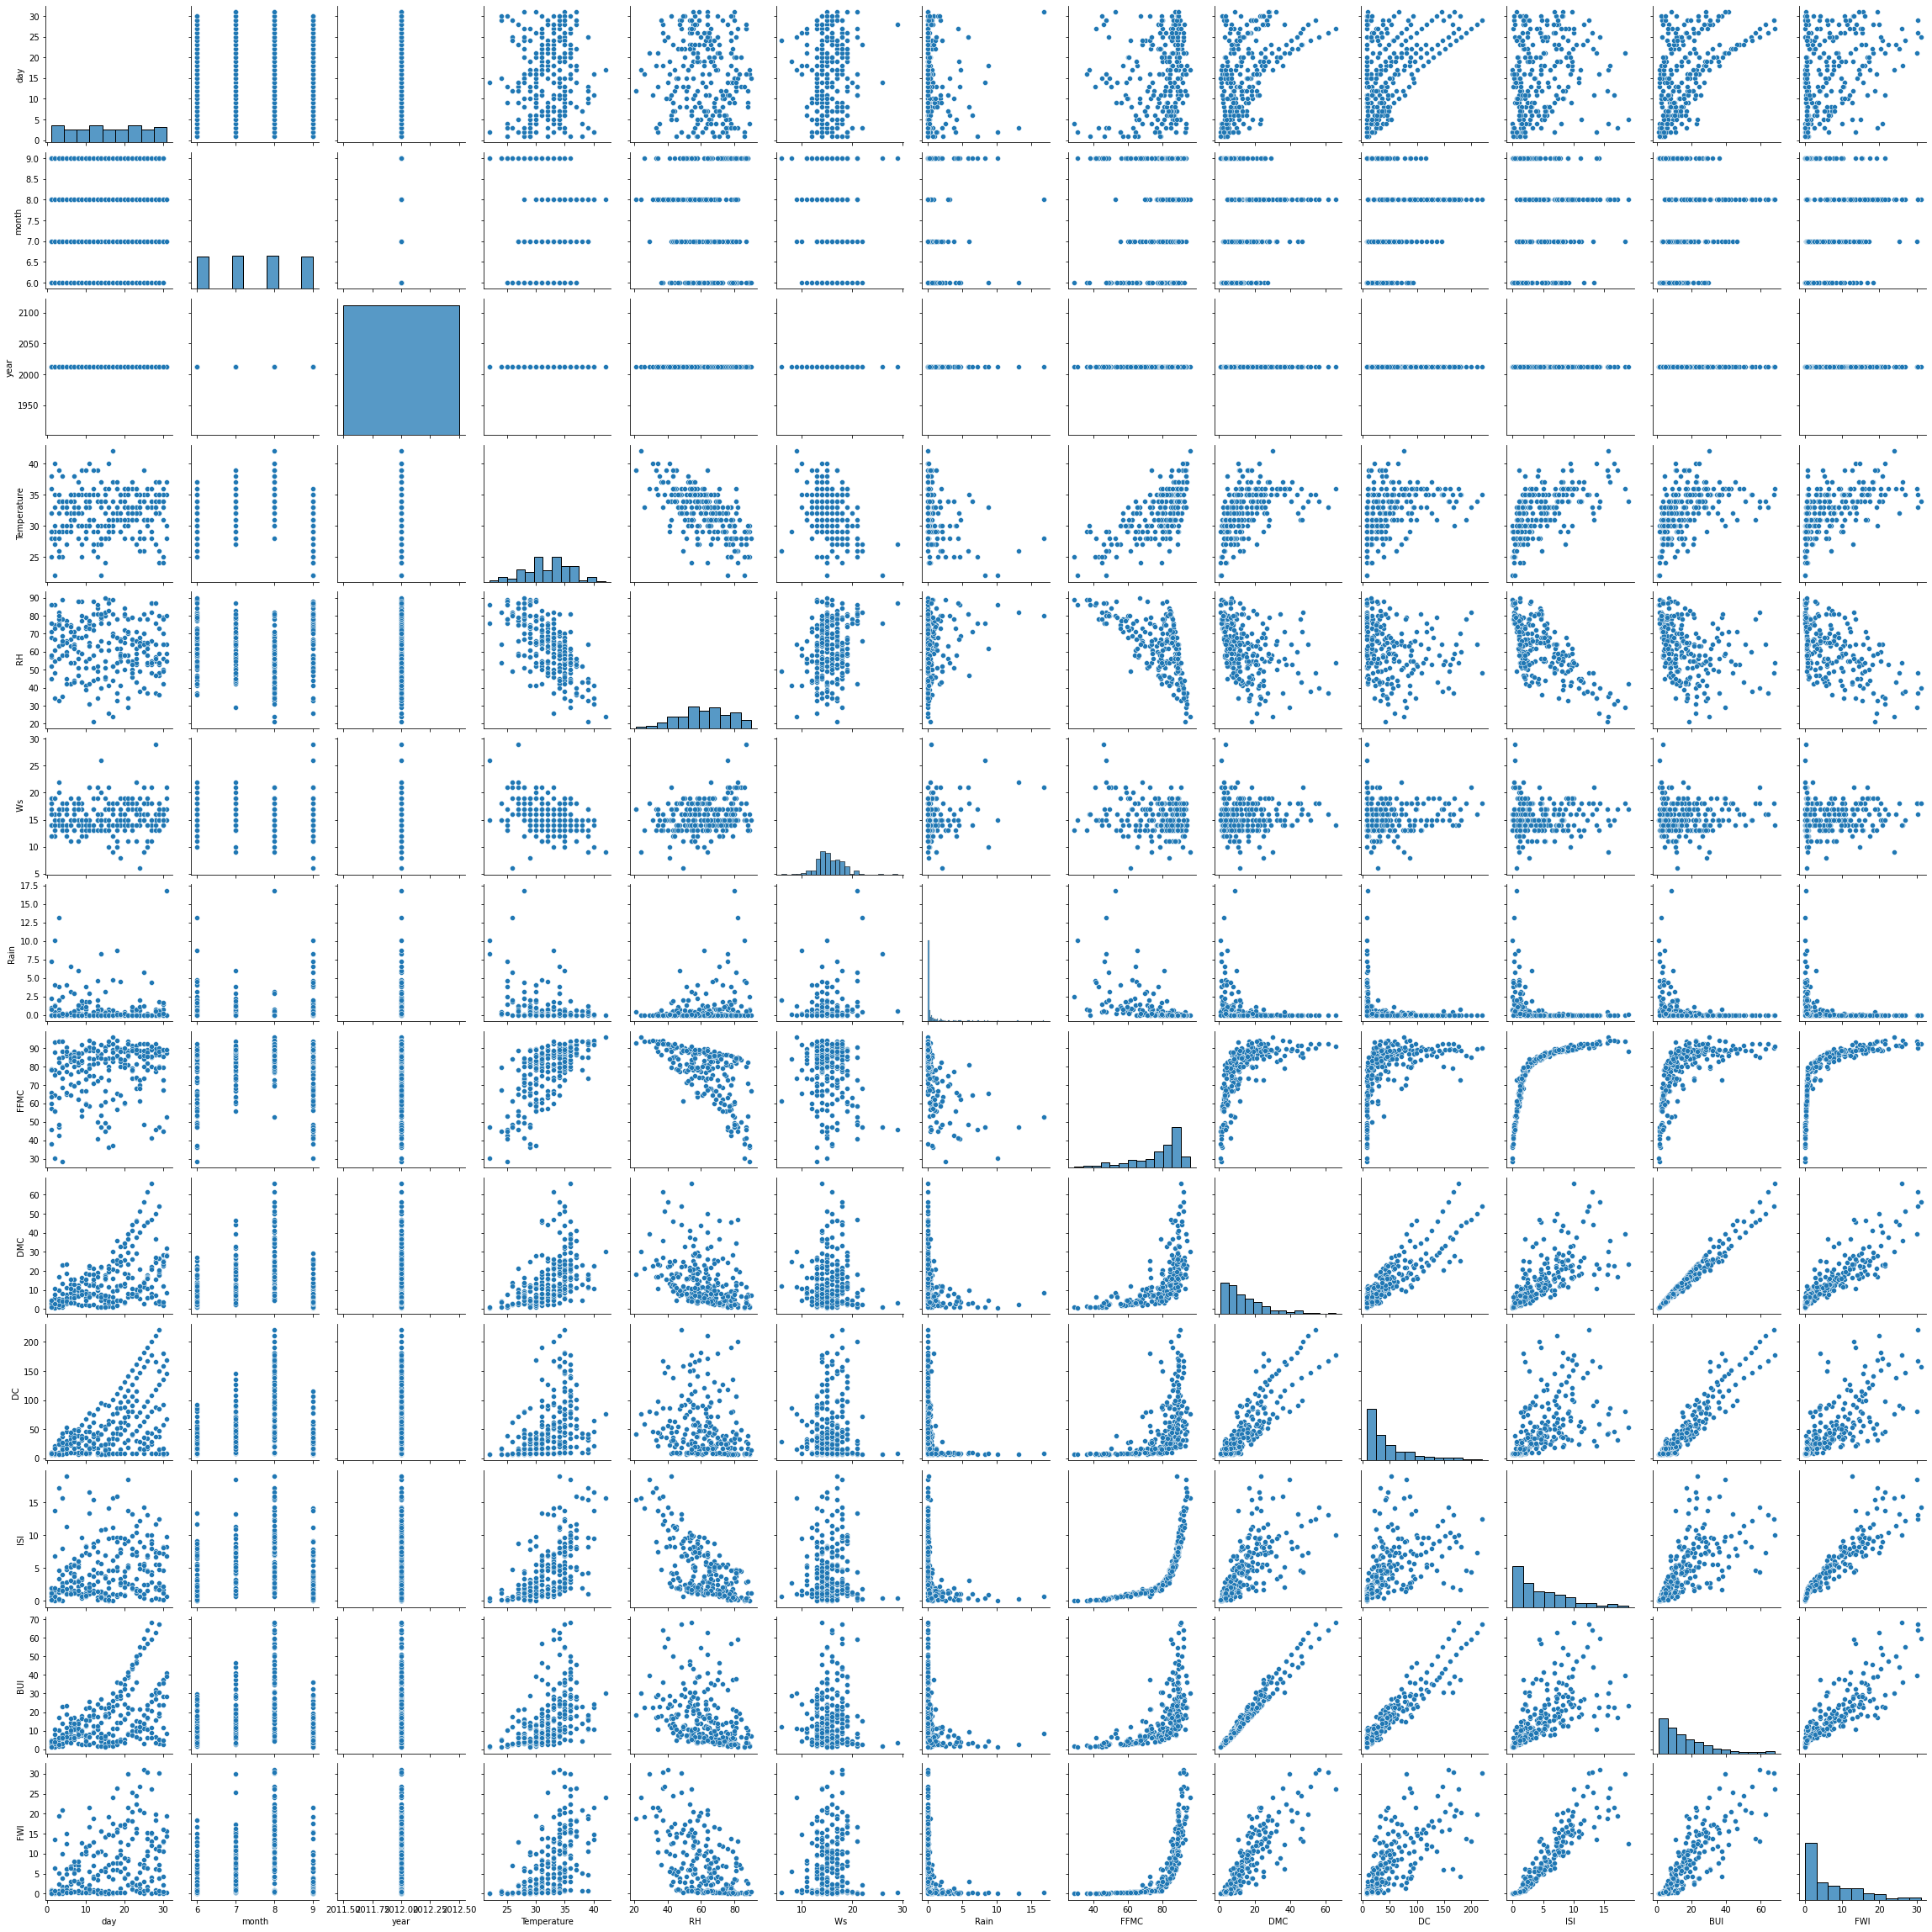

In [509]:
sns.pairplot(df)

In [510]:
numeric_features

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

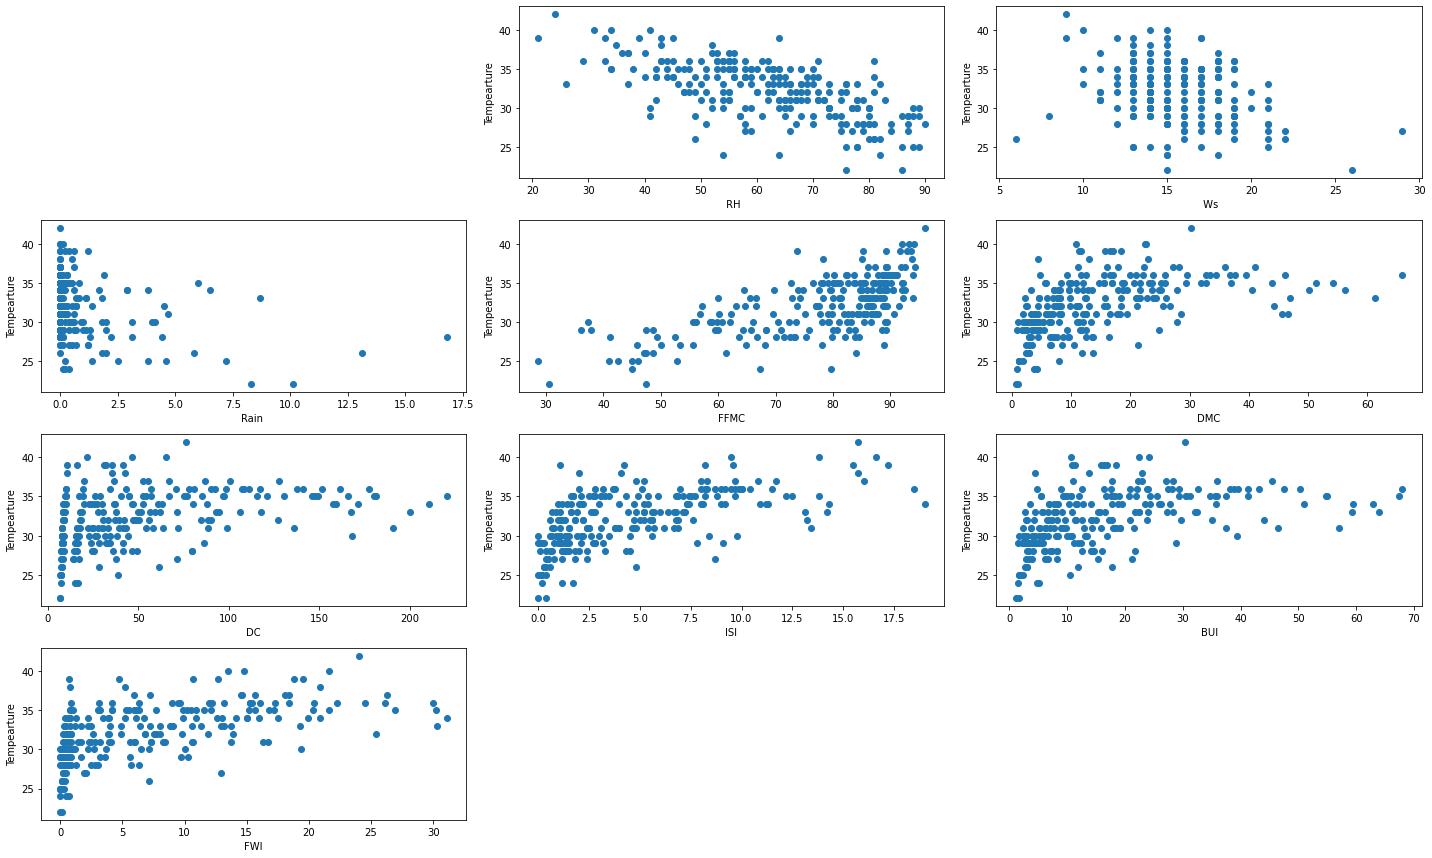

In [558]:
#Plot b/w numeric features and temperature
plt.figure(figsize=(20, 15))
for i in range(4,len(numeric_features)):
    plt.subplot(5, 3, i+1)
    plt.scatter(x=df[numeric_features[i]], y = df['Temperature'])
    plt.xlabel(numeric_features[i])
    plt.ylabel('Tempearture')
    plt.tight_layout()

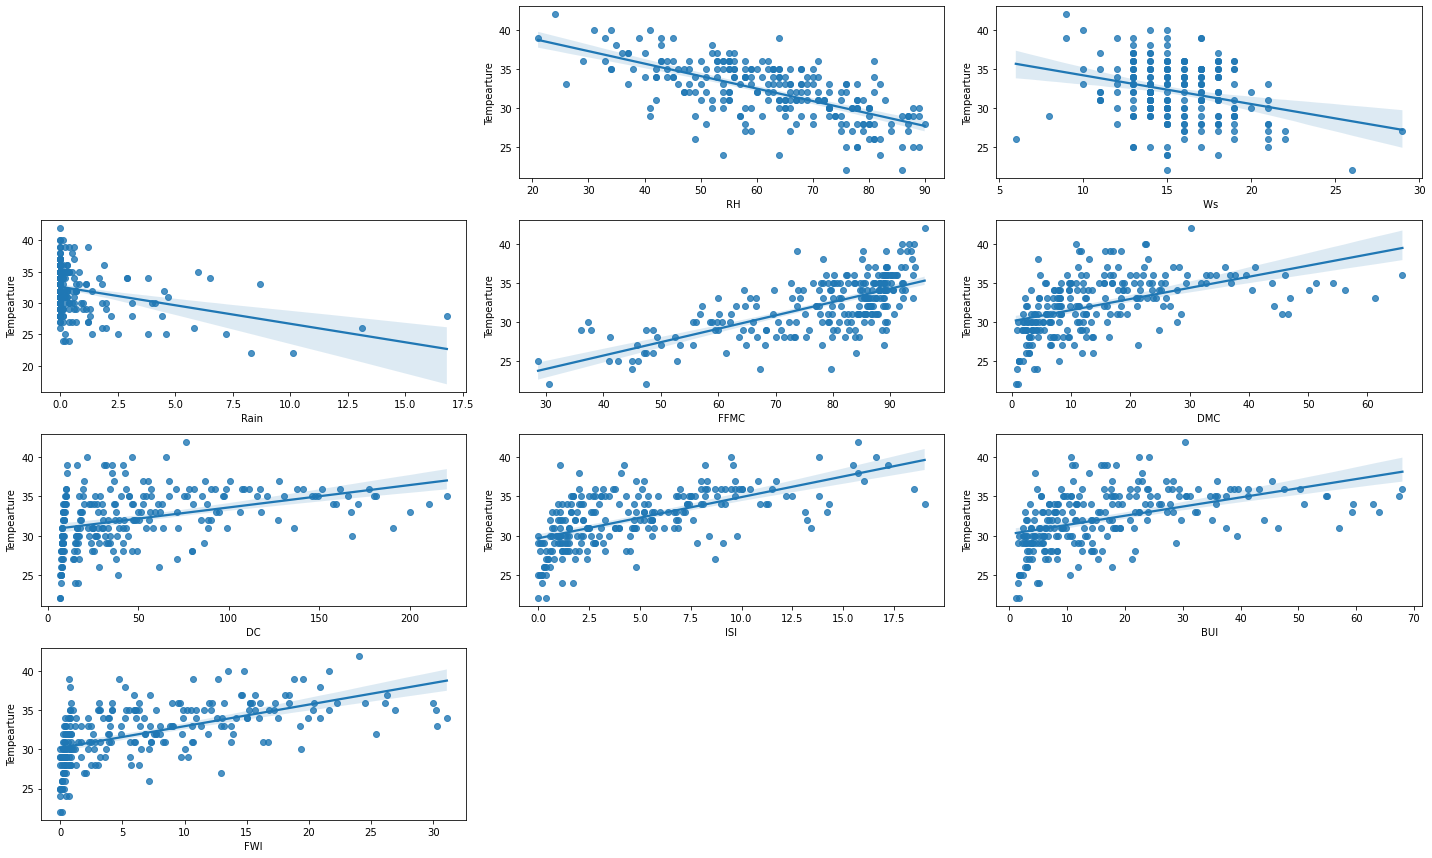

In [512]:
plt.figure(figsize=(20, 15))
for i in range(4,len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.regplot(x=df[numeric_features[i]],y=df['Temperature'],data=df)
    plt.xlabel(numeric_features[i])
    plt.ylabel('Tempearture')
    plt.tight_layout()

**observation**:
From the above plots,If we observe the shaded part is more spreaded if there is less concentration of points and vice-versa 

### Boxplotting

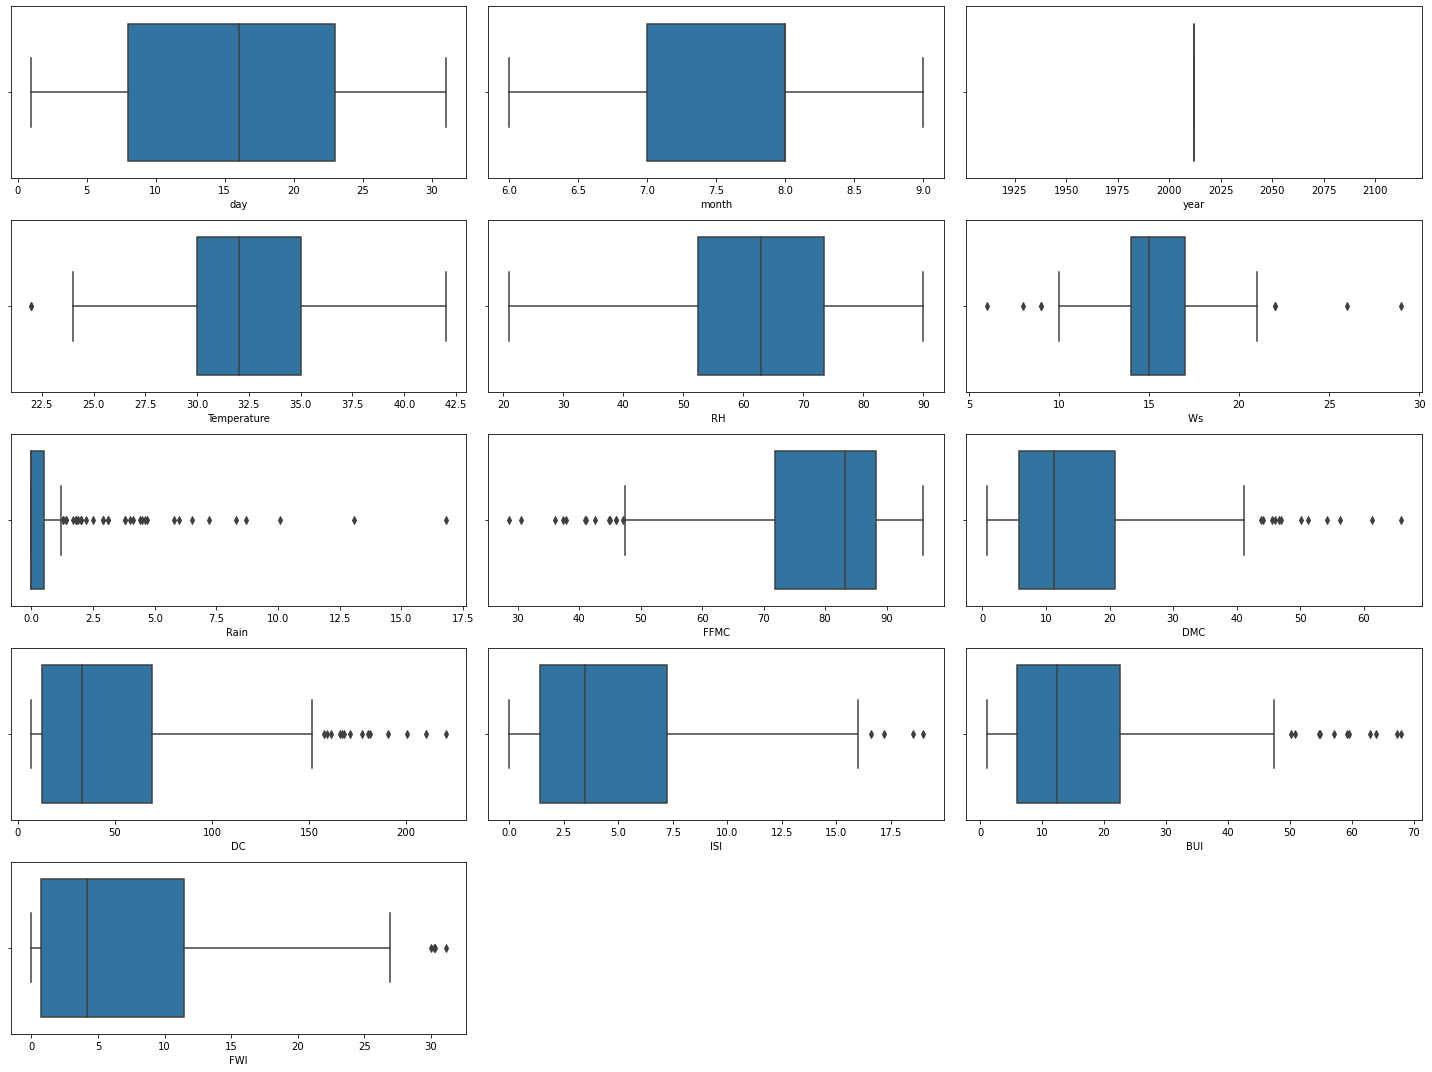

In [513]:
plt.figure(figsize=(20, 15))
for i in range(0,len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]],data=df)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [514]:
#Cleaning the Categorical features
print(df['Classes'].unique())

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [515]:
df['Classes'] = df['Classes'].replace(['not fire   ', 'fire   ','fire ','not fire ','not fire     ','not fire    '], ['not fire', 'fire','fire','fire','not fire','not fire'])

In [516]:
print(df['Classes'].unique())

['not fire' 'fire']


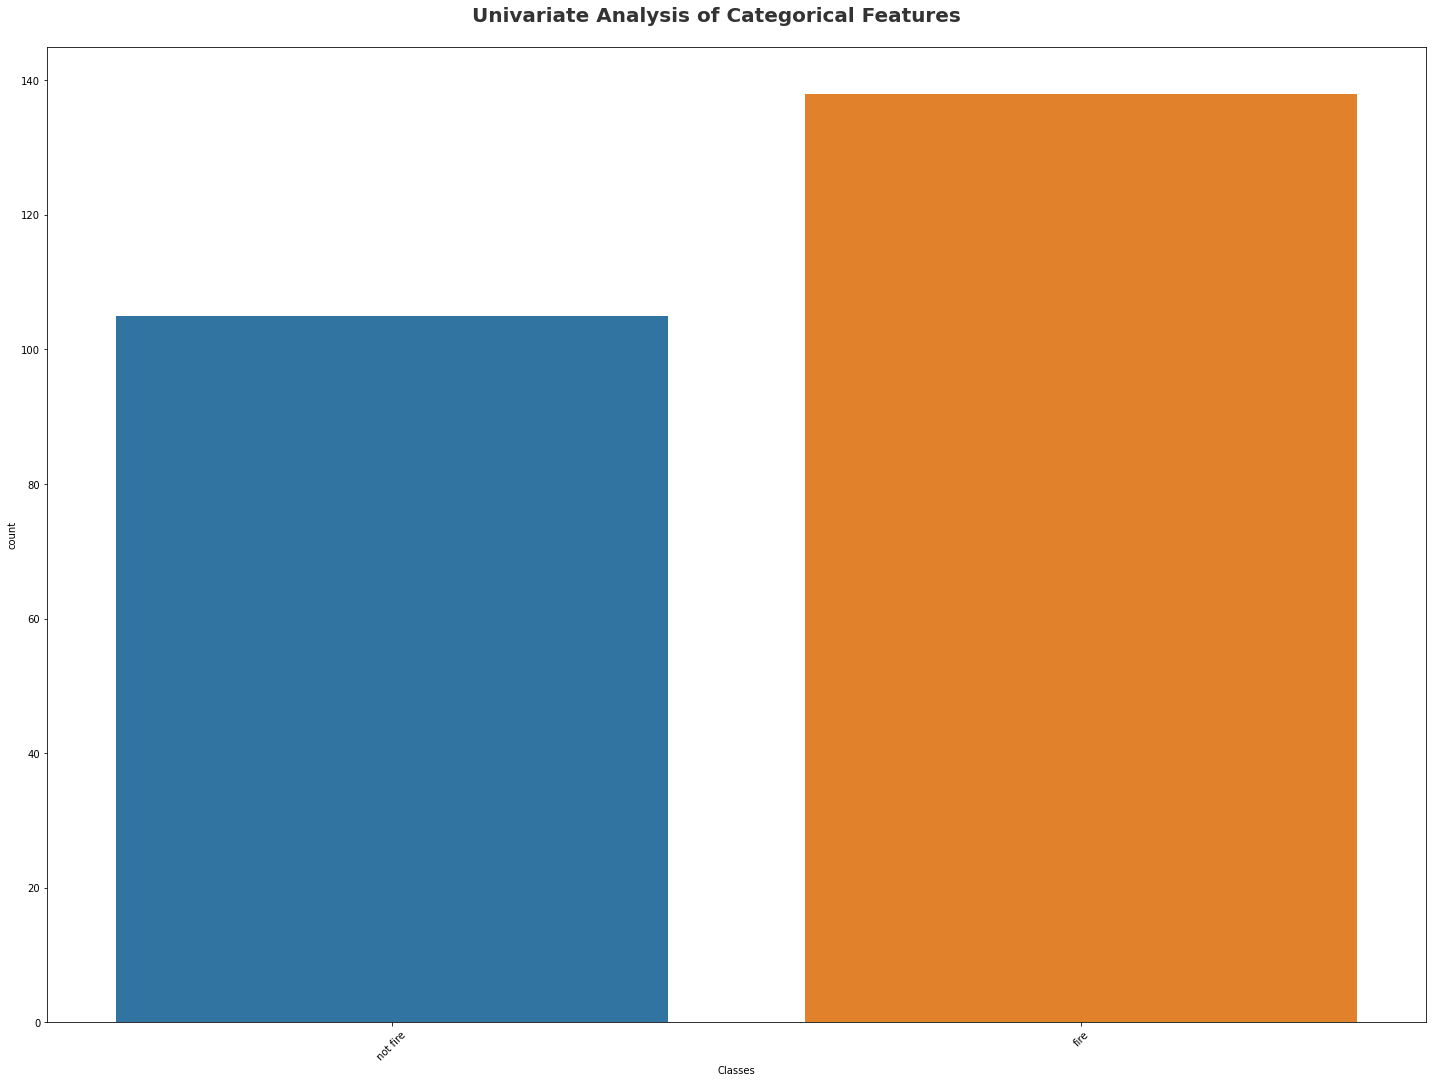

In [517]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(df['Classes'])
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.tight_layout()

In [478]:
df['Classes'].value_counts()

fire        139
not fire    105
Name: Classes, dtype: int64

In [518]:
#Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le_classes = LabelEncoder()
df['Classes'] = le_classes.fit_transform(df['Classes'])
df['Classes'].unique()

array([1, 0])

In [519]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [520]:
X = df.loc[:, df.columns != 'Temperature']
y = df['Temperature']

In [521]:
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,27,9,2012,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [522]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int64

In [523]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 0)

In [524]:
X_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
40,11,7,2012,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,1
13,14,6,2012,78,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4,1
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
137,16,6,2012,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1,1
24,25,6,2012,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,7,8,2012,69,16,0.0,86.5,15.5,48.6,5.5,17.2,8.0,0
193,11,8,2012,31,15,0.0,94.2,22.5,46.3,16.6,22.4,21.6,0
117,26,9,2012,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,1
47,18,7,2012,68,14,0.0,85.4,12.1,43.1,4.6,14.2,6.0,0


In [525]:
 X_test

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
110,19,9,2012,57,14,0.0,89.3,12.5,41.3,7.8,14.2,9.7,0
150,29,6,2012,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2,0
37,8,7,2012,68,19,0.0,85.6,12.5,49.8,6.0,15.4,8.0,0
75,15,8,2012,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0
109,18,9,2012,49,11,0.0,89.4,9.8,33.1,6.8,11.3,7.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,6,8,2012,75,14,0.0,86.4,13.0,39.1,5.2,14.2,6.8,0
26,27,6,2012,53,18,0.0,89.0,21.6,80.3,9.2,25.8,15.0,0
97,6,9,2012,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0.9,1
92,1,9,2012,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0


In [526]:
y_train

40     33
13     30
3      25
137    29
24     31
       ..
67     32
193    40
117    31
47     31
173    32
Name: Temperature, Length: 162, dtype: int64

In [527]:
y_test

110    29
150    37
37     33
75     36
109    32
       ..
66     32
26     34
97     29
92     25
230    34
Name: Temperature, Length: 81, dtype: int64

## Feature Engineering

### Standardize the datasets or feature scaling of datasets

In [528]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [529]:
scaler

StandardScaler()

In [530]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

## Linear Regression

In [531]:
from sklearn.linear_model import LinearRegression

In [532]:
regression = LinearRegression()
regression

LinearRegression()

In [533]:
regression.fit(X_train,y_train)

LinearRegression()

In [534]:
print(regression.coef_)

[-3.15385399e-01 -2.88509437e-01 -1.22124533e-15 -9.54447245e-01
 -7.86081021e-01  8.61237348e-02  1.35820534e+00 -1.42746628e+00
 -3.43184962e-01  4.92835065e-01  2.28075299e+00  2.04306864e-01
  3.92220395e-01]


In [535]:
print(regression.intercept_)

32.23456790123457


In [536]:
reg_pred = regression.predict(X_test)

In [537]:
reg_pred

array([33.37308668, 34.70247789, 31.74746816, 33.46054828, 34.47950201,
       34.23828712, 30.62739538, 33.32310035, 32.59293316, 33.94278925,
       31.22516712, 33.24647435, 34.12872158, 34.69601034, 31.61808438,
       28.28617991, 32.19304562, 31.88587445, 31.34726559, 28.92866884,
       32.24640498, 31.68481835, 31.17405068, 30.18312383, 32.36607332,
       31.18919752, 32.50012352, 28.82119051, 26.32022989, 32.73476927,
       33.53377732, 27.91759456, 29.73611734, 35.39733184, 32.17308541,
       32.06951712, 32.1844697 , 32.73920286, 36.87495628, 32.49971791,
       31.74831836, 28.80000237, 26.54290085, 32.4750327 , 31.41529886,
       26.56365525, 31.07400621, 32.64012505, 25.79662185, 31.3487404 ,
       32.36512927, 33.0719658 , 24.50763312, 30.28945218, 29.64748644,
       31.0986587 , 32.74190094, 33.3073481 , 32.29382489, 34.61377068,
       30.64939922, 36.0527967 , 30.13116932, 36.64764936, 35.96671614,
       36.01088518, 31.42406178, 25.79671177, 36.29805995, 33.50

### Asumptions of linear Regression

Text(0, 0.5, 'test predicted data')

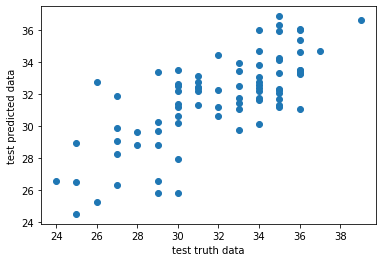

In [538]:
plt.scatter(y_test,reg_pred)
plt.xlabel('test truth data')
plt.ylabel('test predicted data')

In [539]:
residuals = y_test-reg_pred

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

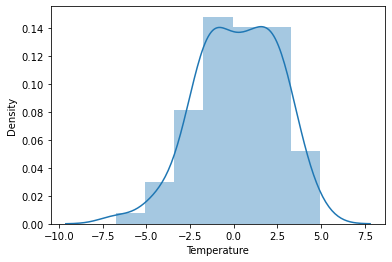

In [540]:
sns.distplot(residuals,kde=True)

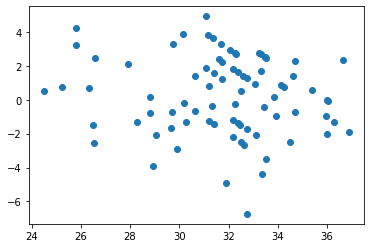

In [541]:
plt.scatter(reg_pred,residuals)

In [542]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.331536592772915
1.9211452226466583
2.3090120382477255


In [543]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.5371273542425357


## Ridge Regression

In [544]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [545]:
ridge.fit(X_train,y_train)

Ridge()

In [546]:
rid_pre = ridge.predict(X_test)

In [547]:
rid_pre

array([33.36598464, 34.74968664, 31.73978461, 33.4934413 , 34.45640132,
       34.19044393, 30.63056915, 33.27552452, 32.64867496, 33.85288992,
       31.22812275, 33.37703463, 34.18227405, 34.79171044, 31.56568169,
       28.27285147, 32.05025206, 31.87233298, 31.38062978, 28.92041392,
       32.33070395, 31.69825867, 31.37427102, 30.18761076, 32.39585525,
       31.25645208, 32.56356891, 28.81081144, 26.41252252, 32.75384331,
       33.5452301 , 27.93968792, 29.71660208, 35.26825516, 32.21215834,
       32.04609169, 32.1394197 , 32.82009644, 36.9582931 , 32.3478001 ,
       31.79698499, 28.81163935, 26.57166354, 32.4617213 , 31.38879452,
       26.59293407, 31.2797766 , 32.67212066, 25.83848217, 33.37733541,
       32.42391729, 33.14076408, 24.5447975 , 30.34147657, 29.66264062,
       31.06615828, 32.86456059, 33.26632047, 32.24369274, 34.67765231,
       30.65963466, 36.06166254, 30.11170906, 36.56805048, 35.85316998,
       36.04976142, 31.3883219 , 25.85647341, 36.0775915 , 33.56

### Asumptions of Ridge Regression

In [548]:
residuals_rid = y_test-rid_pre

In [549]:
residuals_rid

110   -4.365985
150    2.250313
37     1.260215
75     2.506559
109   -2.456401
         ...   
66    -0.287987
26     0.190738
97    -0.773335
92    -1.548595
230   -2.003111
Name: Temperature, Length: 81, dtype: float64

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

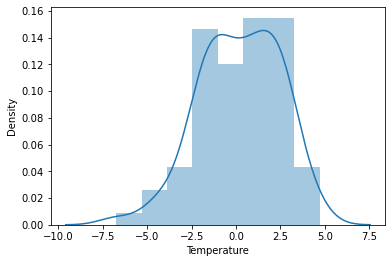

In [550]:
sns.distplot(residuals_rid,kde=True)

Text(0, 0.5, 'test predicted data')

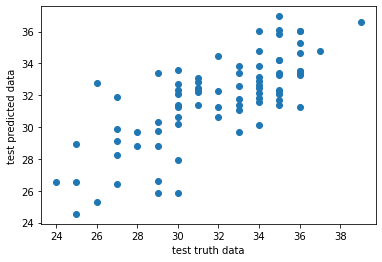

In [551]:
plt.scatter(y_test,rid_pre)
plt.xlabel('test truth data')
plt.ylabel('test predicted data')

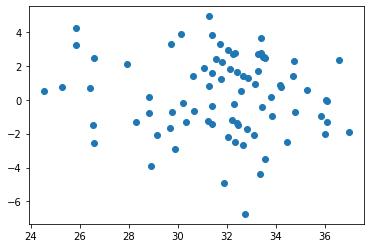

In [552]:
plt.scatter(rid_pre,residuals)

In [553]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,rid_pre))
print(mean_absolute_error(y_test,rid_pre))
print(np.sqrt(mean_squared_error(y_test,rid_pre)))

5.1338347230025825
1.884555086364809
2.265796708224854


In [554]:
from sklearn.metrics import r2_score
score = r2_score(y_test,rid_pre)
print(score)

0.5542914092835979


## Lasso Regression

In [555]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [556]:
lasso.fit(X_train,y_train)

Lasso()

In [557]:
lasso_pred = lasso.predict(X_test)

In [377]:
lasso_pred

array([33.30169708, 34.00834362, 32.50788072, 32.84339053, 33.67283381,
       32.99748107, 30.10366183, 32.84627928, 32.98102693, 32.95208372,
       31.77158271, 33.31526247, 33.61658973, 33.94196106, 31.46954718,
       29.44603749, 31.94178718, 32.31960763, 32.2148795 , 28.99767146,
       32.36789372, 32.48400675, 31.39050545, 29.9014553 , 32.31453839,
       32.44602924, 32.54767066, 30.15846154, 28.94847916, 31.43663891,
       33.47532846, 29.98157335, 30.23569083, 33.49920243, 32.60663339,
       32.01864842, 32.19318602, 32.5069745 , 34.38707028, 32.17582567,
       32.44891799, 31.11016341, 28.6334164 , 32.6444408 , 32.04722357,
       27.61533197, 32.39593071, 32.36047389, 27.8947678 , 32.54333754,
       32.41473544, 33.15284588, 28.13350747, 31.80811585, 31.63827943,
       31.61621789, 33.11540653, 33.38020065, 33.07924144, 33.66722641,
       31.76416288, 34.49468716, 30.69255301, 34.74138482, 34.57661764,
       34.08846167, 32.00924606, 27.71082784, 33.77393708, 33.19

In [378]:
residuals_lasso = y_test-lasso_pred

### Asumptions of Ridge Regression

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

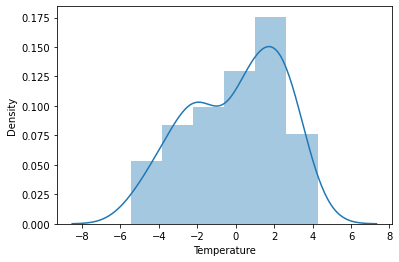

In [379]:
sns.distplot(residuals_lasso,kde=True)

Text(0, 0.5, 'test predicted data')

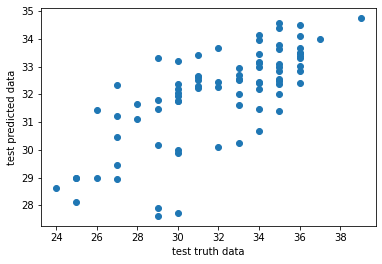

In [380]:
plt.scatter(y_test,lasso_pred)
plt.xlabel('test truth data')
plt.ylabel('test predicted data')

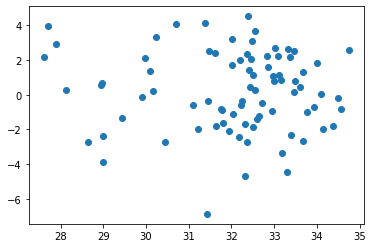

In [381]:
plt.scatter(lasso_pred,residuals)

In [382]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

6.0035834218833
2.108868313259203
2.4502210965305355


In [383]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lasso_pred)
print(score)

0.47878168063599835


## Elasticnet Regression

In [440]:
from sklearn.linear_model import ElasticNet

In [441]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
ElasticNet(random_state=0)

ElasticNet(random_state=0)

In [386]:
print(regr.coef_)

[-0.         -0.          0.         -0.62298764 -0.30076822 -0.
  0.72880935  0.08634169  0.          0.32854193  0.035779    0.24545192]


In [387]:
print(regr.intercept_)

32.23456790123457


In [388]:
elas_pred = regr.predict(X_test)

In [389]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elas_pred))
print(mean_absolute_error(y_test,elas_pred))
print(np.sqrt(mean_squared_error(y_test,elas_pred)))

5.810746426158397
2.0425648987702045
2.4105489885414895


In [391]:
from sklearn.metrics import r2_score
score = r2_score(y_test,elas_pred)
print(score)

0.4955233776792297
